# Task 5: Visualizing Correlations – Titanic Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load Titanic dataset

In [2]:
df = sns.load_dataset("titanic")

In [3]:
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Step 2: Select numerical columns

In [4]:
num_df = df.select_dtypes(include=["int64", "float64"])

## Step 3: Drop missing values

In [5]:
num_df = num_df.dropna()

In [6]:
print("\nNumerical columns in Titanic dataset:")
print(num_df.columns)


Numerical columns in Titanic dataset:
Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


## Step 4: Compute correlation matrix

In [7]:
corr_matrix = num_df.corr()

In [8]:
print("\nCorrelation matrix:")
print(corr_matrix)


Correlation matrix:
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.359653 -0.077221 -0.017358  0.093317  0.268189
pclass   -0.359653  1.000000 -0.369226  0.067247  0.025683 -0.554182
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.017358  0.067247 -0.308247  1.000000  0.383820  0.138329
parch     0.093317  0.025683 -0.189119  0.383820  1.000000  0.205119
fare      0.268189 -0.554182  0.096067  0.138329  0.205119  1.000000


## Step 5: Plot heatmap

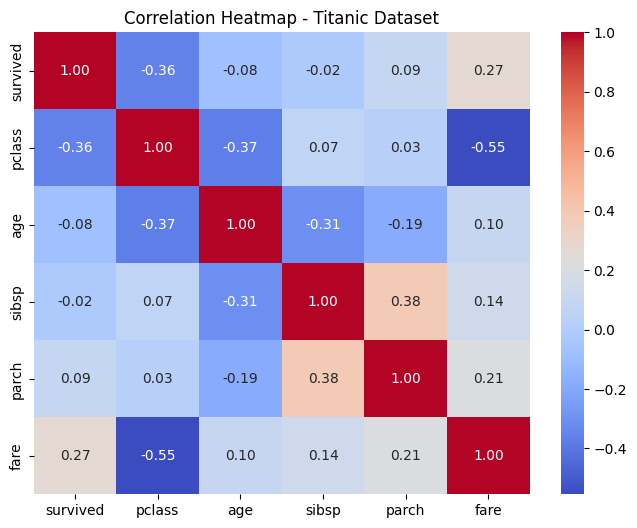

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()

## Step 6: Interpretation

In [10]:
strong_corr = corr_matrix.unstack().sort_values(ascending=False)
print("\nTop correlations (excluding self-correlations):")
print(strong_corr[strong_corr < 1].head(5))


Top correlations (excluding self-correlations):
parch     sibsp       0.383820
sibsp     parch       0.383820
fare      survived    0.268189
survived  fare        0.268189
fare      parch       0.205119
dtype: float64
